In [ ]:
import pandas as pd

# Load the dataset
file_path = 'country_wise_latest.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = 'country_wise_latest.csv'
data = pd.read_csv(file_path)

# Verify data is loaded
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values (if applicable)
data = data.dropna()
# Proceed with further processing...


In [4]:

data.isnull().sum()

data = data.dropna()


data['Confirmed'] = pd.to_numeric(data['Confirmed'], errors='coerce')
data['Active'] = pd.to_numeric(data['Active'], errors='coerce')

data = data.dropna(subset=['Confirmed', 'Active'])

X = data[['Confirmed']]
y = data['Active']


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 31624492.540682346


In [6]:

future_confirmed = pd.DataFrame({'Confirmed': np.linspace(X['Confirmed'].min(), X['Confirmed'].max() + 10000, 100)})
future_predictions = model.predict(future_confirmed)


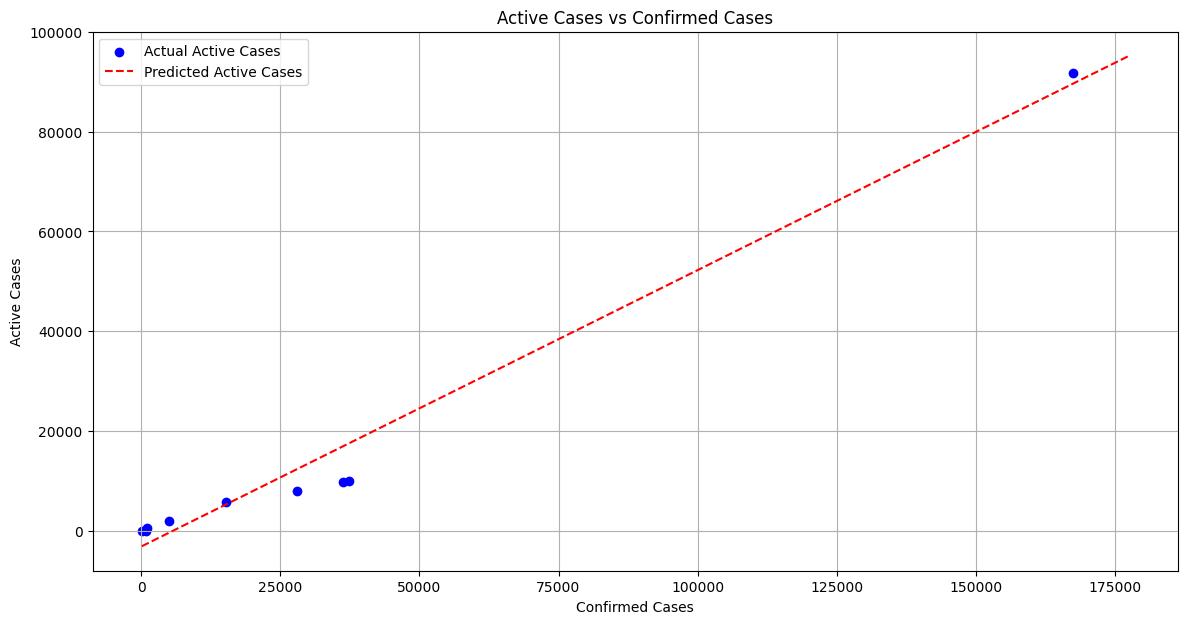

In [7]:
import matplotlib.pyplot as plt


plt.figure(figsize=(14, 7))
plt.scatter(X, y, color='blue', label='Actual Active Cases')
plt.plot(future_confirmed, future_predictions, color='red', linestyle='--', label='Predicted Active Cases')

plt.xlabel('Confirmed Cases')
plt.ylabel('Active Cases')
plt.title('Active Cases vs Confirmed Cases')
plt.legend()
plt.grid(True)
plt.show()